<a href="https://colab.research.google.com/github/NicoEssi/TensorFlow_Exercises/blob/master/Sequential_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0

import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
print(keras.__version__)

     |████████████████████████████████| 86.3MB 45.1MB/s 
     |████████████████████████████████| 3.8MB 34.5MB/s 
     |████████████████████████████████| 450kB 49.9MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0rc3
    Uninstalling tensorflow-1.15.0rc3:
      Successfully uninstalled tensorflow-1.15.0rc3
2.0.0
2.2.4-tf


# Image Classification of Fashion MNIST

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [0]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

#model.layers[1].get_weights()

In [0]:
model0 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [0]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

In [7]:
history = model.fit(X_train, y_train, epochs = 35,
                    validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/35
55000/55000 [==============================] - 8s 139us/sample - loss: 0.7155 - accuracy: 0.7699 - val_loss: 0.5143 - val_accuracy: 0.8122
Epoch 2/35
55000/55000 [==============================] - 7s 124us/sample - loss: 0.4851 - accuracy: 0.8311 - val_loss: 0.4335 - val_accuracy: 0.8514
Epoch 3/35
55000/55000 [==============================] - 7s 122us/sample - loss: 0.4419 - accuracy: 0.8445 - val_loss: 0.4239 - val_accuracy: 0.8538
Epoch 4/35
55000/55000 [==============================] - 7s 127us/sample - loss: 0.4141 - accuracy: 0.8532 - val_loss: 0.4028 - val_accuracy: 0.8618
Epoch 5/35
55000/55000 [==============================] - 7s 126us/sample - loss: 0.3935 - accuracy: 0.8613 - val_loss: 0.3905 - val_accuracy: 0.8680
Epoch 6/35
55000/55000 [==============================] - 7s 134us/sample - loss: 0.3775 - accuracy: 0.8663 - val_loss: 0.3665 - val_accuracy: 0.8708
Epoch 7/35
55000/55000 [===========================

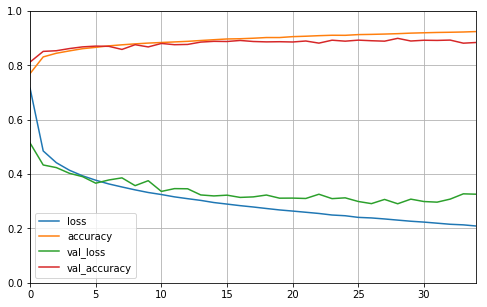

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [9]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.35925408383607865, 0.8683]

In [10]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [11]:
y_pred = model.predict_classes(X_new)
print(y_pred)
np.array(class_names)[y_pred]

[9 2 1]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# Regression Multi-Layer Perceptron with Californian Housind Data

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [13]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])


model.compile(loss = "mean_squared_error",
             optimizer = "sgd")


history = model.fit(X_train, y_train, epochs = 20,
                   validation_data = (X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 73us/sample - loss: 0.7435 - val_loss: 0.5176
Epoch 2/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5000 - val_loss: 0.9368
Epoch 3/20
11610/11610 [==============================] - 1s 53us/sample - loss: 1.6242 - val_loss: 4.0534
Epoch 4/20
11610/11610 [==============================] - 1s 54us/sample - loss: 1.4035 - val_loss: 0.4292
Epoch 5/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.4223 - val_loss: 0.4159
Epoch 6/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.4052 - val_loss: 0.4045
Epoch 7/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.3903 - val_loss: 0.3958
Epoch 8/20
11610/11610 [==============================] - 1s 57us/sample - loss: 0.4658 - val_loss: 0.4408
Epoch 9/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.4062 - val_l